In [14]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
recent_grads = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-16/recent-grads.csv")

In [6]:

recent_grads['Major'] = recent_grads['Major'].str.title()

In [7]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,Petroleum Engineering,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,Mining And Mineral Engineering,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,Metallurgical Engineering,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,Naval Architecture And Marine Engineering,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,Chemical Engineering,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


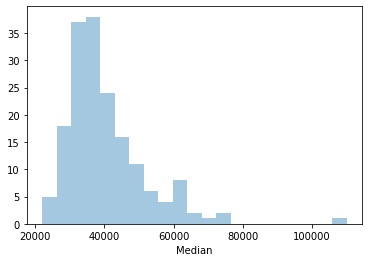

In [15]:
sns.distplot(recent_grads['Median'], kde = False)

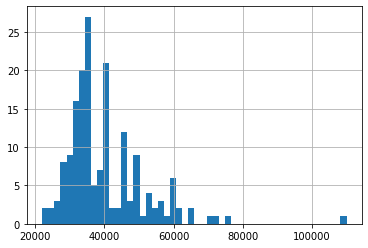

In [12]:
recent_grads['Median'].hist(bins = 50)

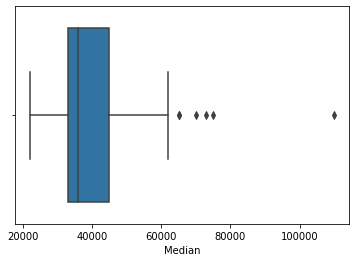

In [16]:
sns.boxplot(recent_grads['Median'])

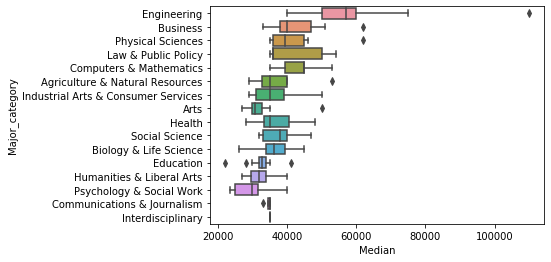

In [19]:
sns.boxplot(x='Median', y='Major_category', data = recent_grads)

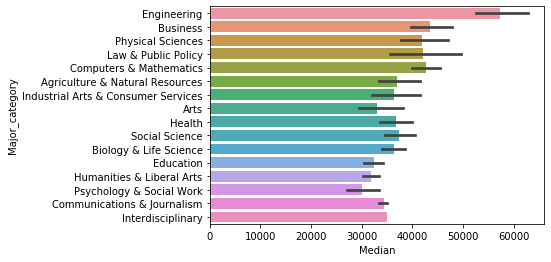

In [20]:
sns.barplot(x='Median', y='Major_category', data = recent_grads)

## What are the highest earning majors?

In [33]:
df = recent_grads.pivot_table('Median', ['Major', 'Major_category', 'P25th', 'P75th'], aggfunc='median').reset_index()
df.sort_values('Median', ascending = False)

,Major,Major_category,P25th,P75th,Median
140,Petroleum Engineering,Engineering,95000,125000,110000
115,Mining And Mineral Engineering,Engineering,55000,90000,75000
112,Metallurgical Engineering,Engineering,50000,105000,73000
131,Naval Architecture And Marine Engineering,Engineering,43000,80000,70000
23,Chemical Engineering,Engineering,50000,75000,65000
...,...,...,...,...,...
172,Zoology,Biology & Life Science,20000,39000,26000
26,Clinical Psychology,Psychology & Social Work,25000,40000,25000
51,Educational Psychology,Psychology & Social Work,24000,34000,25000
42,Counseling Psychology,Psychology & Social Work,19200,26000,23400


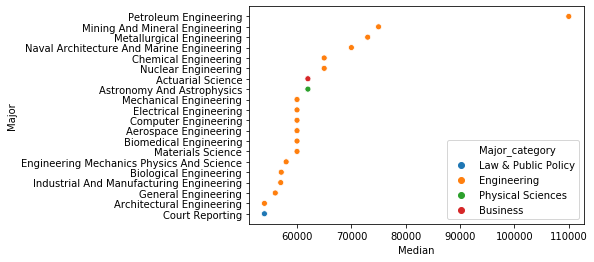

In [47]:
df2 = recent_grads.nlargest(20,'Median')
df2 = df2.sort_values('Median', ascending = True).reset_index(drop=True)
sns.scatterplot(x='Median', y='Major', data = df2, hue = 'Major_category')

In [49]:
# Unable to figure out how to do 'Tie Fighter plot, with error bars for the 25th and 75th percentile)
df2 = recent_grads.nlargest(20,'Median')
df2 = df2.sort_values('Median', ascending = True).reset_index(drop=True)
sns.scatterplot(x='Median', y='Major', data = df2, hue = 'Major_category', xerr= df2['P25th'])

AttributeError: 'PathCollection' object has no property 'yerr'

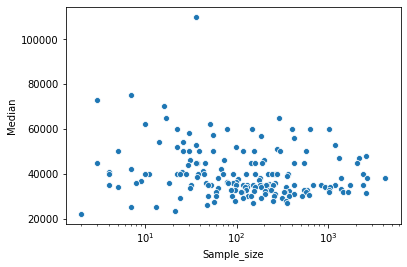

In [56]:
sns.scatterplot(x='Sample_size', y='Median', data = recent_grads, x_jitter = 0.25).set_xscale("log")
# Note that the next step is to text label the points - 
# It is possible [here](https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn) but not trivial

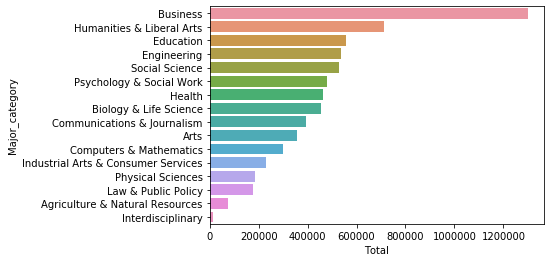

In [72]:
df3 = recent_grads.groupby('Major_category').agg({'Total': 'sum'})
df3 = df3.reset_index()
sns.barplot(x='Total', y='Major_category', data = df3, order=df3.sort_values('Total', ascending=False).Major_category)

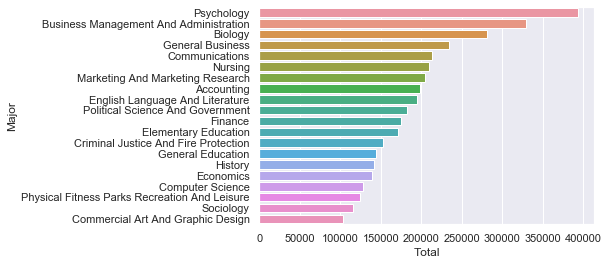

In [119]:
df3 = recent_grads.groupby('Major').agg({'Total': 'sum'})
df4 = df3.nlargest(20,'Total')
df4 = df4.reset_index()
sns.barplot(x='Total', y='Major', data = df4, order=df4.sort_values('Total', ascending=False).Major)

In [143]:
dfa=recent_grads.sort_values('Total').nlargest(20, 'Total')


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,Psychology,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
76,77,6203,Business Management And Administration,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
123,124,3600,Biology,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
57,58,6200,General Business,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
93,94,1901,Communications,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,...,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440
34,35,6107,Nursing,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
77,78,6206,Marketing And Marketing Research,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
40,41,6201,Accounting,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
137,138,3301,English Language And Literature,194673.0,58227.0,136446.0,Humanities & Liberal Arts,0.700898,1436,149180,...,57825,81180,14345,0.087724,32000,23000,41000,57690,71827,26503
78,79,5506,Political Science And Government,182621.0,93880.0,88741.0,Social Science,0.485930,1387,133454,...,43711,83236,15022,0.101175,38000,28000,50000,36854,66947,19803


### How does gender breakdown relative to typical earnings?

In [252]:

dfa= dfa[['Major','Men', 'Women']]
dfa1= pd.melt(dfa, id_vars = ['Major'], var_name = 'Gender', value_name = 'Number')

,Major,Gender,Number
0,Psychology,Men,86648.0
1,Business Management And Administration,Men,173809.0
2,Biology,Men,111762.0
3,General Business,Men,132238.0
4,Communications,Men,70619.0
5,Nursing,Men,21773.0
6,Marketing And Marketing Research,Men,78857.0
7,Accounting,Men,94519.0
8,English Language And Literature,Men,58227.0
9,Political Science And Government,Men,93880.0


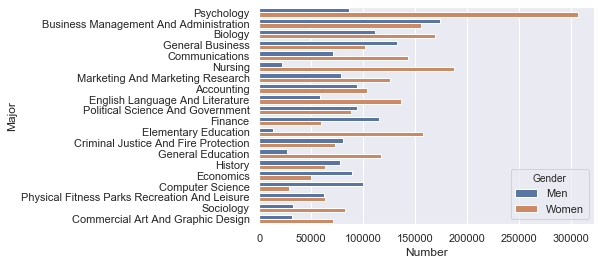

In [147]:
sns.barplot(x='Number', y='Major' , data=dfa1, hue = 'Gender')

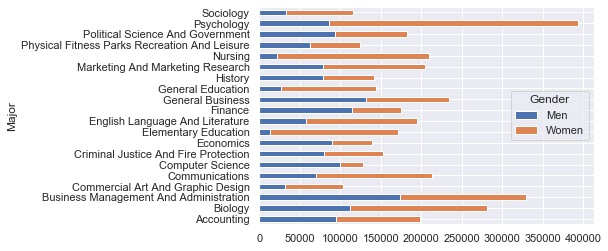

In [158]:

dfa1[['Men','Women']].plot(kind='barh', stacked=True)

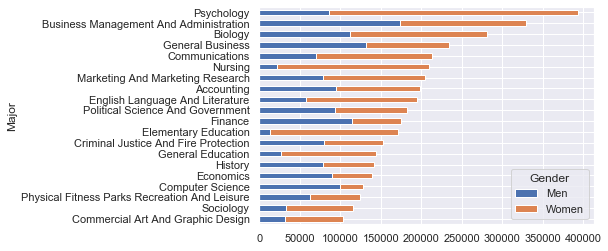

In [165]:
dfa1['mandf']= dfa1["Men"] + dfa1['Women']
dfa1.sort_values('mandf', ascending=True)[['Men','Women']].plot(kind='barh', stacked=True)

In [177]:
dfg = recent_grads.groupby('Major_category').agg({'Total': 'sum','Men':'sum', 'Women':'sum'})
dfg['ShareWomen'] = dfg['Women']/dfg['Total']
dfg.dropna(subset=['ShareWomen'])
dfg.sort_values('ShareWomen', ascending=False)

,Total,Men,Women,ShareWomen
Major_category,,,,
Health,463230.0,75517.0,387713.0,0.836977
Education,559129.0,103526.0,455603.0,0.814844
Psychology & Social Work,481007.0,98115.0,382892.0,0.796022
Interdisciplinary,12296.0,2817.0,9479.0,0.770901
Communications & Journalism,392601.0,131921.0,260680.0,0.663982
Arts,357130.0,134390.0,222740.0,0.623694
Humanities & Liberal Arts,713468.0,272846.0,440622.0,0.617578
Biology & Life Science,453862.0,184919.0,268943.0,0.592566
Industrial Arts & Consumer Services,229792.0,103781.0,126011.0,0.548370


In [200]:
recent_grads['MedianSalary'] = recent_grads['Median'].sum() * recent_grads['Sample_size'].sum() / recent_grads['Sample_size'].sum() 
dfg = recent_grads.groupby('Major_category').agg({'Total': 'sum','Men':'sum', 'Women':'sum'})
dfg['ShareWomen'] = dfg['Women']/dfg['Total']
dfg.dropna(subset=['ShareWomen'])
dfg.sort_values('ShareWomen', ascending=False)

,Total,Men,Women,ShareWomen
Major_category,,,,
Health,463230.0,75517.0,387713.0,0.836977
Education,559129.0,103526.0,455603.0,0.814844
Psychology & Social Work,481007.0,98115.0,382892.0,0.796022
Interdisciplinary,12296.0,2817.0,9479.0,0.770901
Communications & Journalism,392601.0,131921.0,260680.0,0.663982
Arts,357130.0,134390.0,222740.0,0.623694
Humanities & Liberal Arts,713468.0,272846.0,440622.0,0.617578
Biology & Life Science,453862.0,184919.0,268943.0,0.592566
Industrial Arts & Consumer Services,229792.0,103781.0,126011.0,0.548370


In [209]:
recent_grads['MedianSalary'] = recent_grads['Median'].sum() * recent_grads['Sample_size'].sum() / recent_grads['Sample_size'].sum() 
dfg = recent_grads.groupby(['Major_category', 'MedianSalary'],as_index=False).agg({'Total': 'sum','Men':'sum', 'Women':'sum'})
dfg['ShareWomen'] = dfg['Women']/dfg['Total']
dfg.dropna(subset=['ShareWomen'])
by_major_category = dfg.sort_values('ShareWomen', ascending=False)
by_major_category 

,Major_category,MedianSalary,Total,Men,Women,ShareWomen
8,Health,6946200.0,463230.0,75517.0,387713.0,0.836977
6,Education,6946200.0,559129.0,103526.0,455603.0,0.814844
14,Psychology & Social Work,6946200.0,481007.0,98115.0,382892.0,0.796022
11,Interdisciplinary,6946200.0,12296.0,2817.0,9479.0,0.770901
4,Communications & Journalism,6946200.0,392601.0,131921.0,260680.0,0.663982
1,Arts,6946200.0,357130.0,134390.0,222740.0,0.623694
9,Humanities & Liberal Arts,6946200.0,713468.0,272846.0,440622.0,0.617578
2,Biology & Life Science,6946200.0,453862.0,184919.0,268943.0,0.592566
10,Industrial Arts & Consumer Services,6946200.0,229792.0,103781.0,126011.0,0.548370
15,Social Science,6946200.0,529966.0,256834.0,273132.0,0.515376


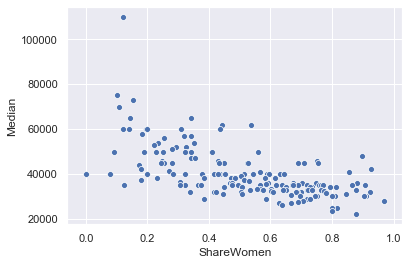

In [218]:
sns.scatterplot(x='ShareWomen', y = 'Median', data=recent_grads)

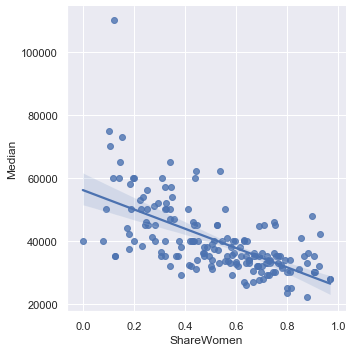

In [231]:
sns.lmplot(x="ShareWomen", y="Median", data=recent_grads)

In [232]:
regr = linear_model.LinearRegression()
regr.fit(recent_grads[['Median','ShareWomen']], recent_grads['Sample_size'])

NameError: name 'linear_model' is not defined

In [238]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
pred_model = ols("Median ~ ShareWomen", data=recent_grads).fit()
predict_model_summary = pred_model.summary()


In [239]:
predict_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Median   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.51e-19
Time:                        10:31:37   Log-Likelihood:                -1809.7
No. Observations:                 172   AIC:                             3623.
Df Residuals:                     170   BIC:                             3630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.609e+04   1705.115     32.897      0.000    5.27e+04    5.95e+04
ShareWomen -3.067e+04   2987.010    -10.268      0.000   -3.66e+04   -2.48e+04
==============================================================================
Omnibus:                       92.256   Durbin-Watson:                   0.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.444
Skew:                           1.851   Prob(JB):                    6.36e-144
Kurtosis:                      11.850   Cond. No.                         5.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This is unweighted (in the D. Robinson example, the results were weighted by sample size), but it shows you that if the field went from 0% women to 100% women, the median salary decreases by -3.067 10^4, or 30,670. For every 1% increase in women, the salary decreases by 306.00

In [236]:
# import and fit an OLS model, check coefficients
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(recent_grads['Median'], recent_grads['ShareWomen'])
# fit WLS using sample_weights
WLS = LinearRegression()
WLS.fit(recent_grads['Median'], recent_grads['ShareWomen'], sample_weight=recent_grads['Sample_size'])
print(model.intercept_, model.coef_)
print('WLS')
print(WLS.intercept_, WLS.coef_)

ValueError: Expected 2D array, got 1D array instead:
array=[110000  75000  73000  70000  65000  65000  62000  62000  60000  60000
  60000  60000  60000  60000  58000  57100  57000  56000  54000  54000
  53000  53000  52000  52000  51000  50000  50000  50000  50000  50000
  50000  50000  50000  50000  48000  47000  47000  46000  46000  46000
  45000  45000  45000  45000  45000  45000  45000  45000  45000  44700
  44000  42000  42000  41300  41000  41000  40100  40000  40000  40000
  40000  40000  40000  40000  40000  40000  40000  40000  40000  40000
  40000  40000  40000  40000  39000  38400  38000  38000  38000  38000
  38000  37500  37400  37000  36400  36200  36000  36000  36000  36000
  36000  36000  35600  35000  35000  35000  35000  35000  35000  35000
  35000  35000  35000  35000  35000  35000  35000  35000  35000  35000
  35000  35000  35000  34000  34000  34000  34000  34000  34000  34000
  34000  33500  33500  33400  33000  33000  33000  33000  33000  33000
  33000  33000  33000  32500  32400  32200  32100  32000  32000  32000
  32000  32000  32000  32000  32000  31500  31000  31000  31000  30500
  30000  30000  30000  30000  30000  30000  30000  30000  29000  29000
  29000  29000  28000  28000  28000  27500  27000  27000  26000  25000
  25000  23400  22000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [253]:
df_temp= recent_grads[['Major_category','Men', 'Women']]
gender_by_major_category= pd.melt(df_temp, id_vars = ['Major_category'], var_name = 'Gender', value_name = 'Number')
gender_by_major_category
#gender_by_major_category['mandf']= gender_by_major_category["Men"] + gender_by_major_category['Women']

,Major_category,Gender,Number
0,Engineering,Men,2057.0
1,Engineering,Men,679.0
2,Engineering,Men,725.0
3,Engineering,Men,1123.0
4,Engineering,Men,21239.0
...,...,...,...
341,Biology & Life Science,Women,5359.0
342,Psychology & Social Work,Women,2332.0
343,Psychology & Social Work,Women,2270.0
344,Psychology & Social Work,Women,3695.0


In [ ]:
# This needs to be fixed - it is just the same earlier gender by major instead of by major category
gender_by_major_category= pd.melt(df_temp, id_vars = ['Major_category'], var_name = 'Gender', value_name = 'Number')
gender_by_major_category['mandf']= gender_by_major_category["Men"] + gender_by_major_category['Women']
gender_by_major_category.sort_values('mandf', ascending=True)[['Men','Women']].plot(kind='barh', stacked=True)

## Links used to look up how to do this:
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(4)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">seaborn.boxplot — seaborn 0.10.1 documentation</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/43222137/how-to-groupby-based-on-two-columns-in-pandas">python - How to groupby based on two columns in pandas? - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(6)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://www.geeksforgeeks.org/python-pandas-series-str-lower-upper-and-title/">Python | Pandas Series.str.lower(), upper() and title() - GeeksforGeeks</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(4)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html">seaborn.scatterplot — seaborn 0.10.1 documentation</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/37598665/how-to-plot-a-value-counts-in-pandas-that-has-a-huge-number-of-different-counts">python - How to plot a value_counts in pandas that has a huge number of different counts not distributed evenly - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/37414916/pythons-matplotlib-plotting-in-wrong-order">Python's Matplotlib plotting in wrong order - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/38385099/adding-simple-error-bars-to-seaborn-factorplot">python - Adding simple error bars to Seaborn factorplot - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/36351774/style-of-error-bar-in-pandas-plot">matplotlib - Style of error bar in pandas plot - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn">python - Adding labels in x y scatter plot with seaborn - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/18554920/pandas-aggregate-count-distinct">python - Pandas aggregate count distinct - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(7)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/#:~:text=Sort%20Bars%20in%20Barplot%20in,order%20we%20want%20to%20plot.">How To Sort Bars in Barplot using Seaborn in Python? - Data Viz with Python and R</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(8)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://docs.github.com/en/github/managing-files-in-a-repository/working-with-jupyter-notebook-files-on-github">Working with Jupyter Notebook files on GitHub - GitHub Docs</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(9)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://win-vector.com/2019/03/19/tidyverse-users-gather-spread-are-on-the-way-out/">Tidyverse users: gather/spread are on the way out – Win Vector LLC</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(10)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="http://www.datasciencemadesimple.com/reshape-wide-long-pandas-python-melt-function/">Reshape wide to long in pandas python with melt() function - DataScience Made Simple</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(11)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c">Selecting Subsets of Data in Pandas: Part 1 | by Ted Petrou | Dunder Data | Medium</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/54162981/how-to-display-data-values-in-stacked-horizontal-bar-chart-in-matplotlib">python - How to display data values in stacked horizontal bar chart in Matplotlib - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/40902958/pandas-dataframe-bar-plot-with-sort-values-by-other-column">python - Pandas DataFrame bar plot with sort_values by other column - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns">python - Apply multiple functions to multiple groupby columns - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(12)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">pandas.DataFrame.dropna — pandas 1.1.0 documentation</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(13)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://www.delftstack.com/howto/python-pandas/how-to-get-the-sum-of-pandas-column/">How to get the sum of Pandas column | Delft Stack</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/51584363/pandas-groupby-multiple-columns-list-of-multiple-columns">python - Pandas groupby multiple columns, list of multiple columns - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/37234163/how-to-add-a-line-of-best-fit-to-scatter-plot">python - How to add a line of best fit to scatter plot - Stack Overflow</a>
      </div>

    
      <div style="padding-left: 24px; padding-top: 8px; position: relative; font-size: 13px;">
        <img src="./OneTab shared tabs_files/favicons(5)" style="vertical-align: middle; width:16px; height:16px">
        <a style="vertical-align: middle; padding-left: 10px; padding-right: 12px; text-decoration: none;" href="https://stackoverflow.com/questions/26597116/seaborn-plots-not-showing-up">python - Seaborn plots not showing up - Stack Overflow</a>
      </div>

 